In [1]:
import pysal as ps
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

from math import ceil

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from esda.adbscan import ADBSCAN

/Users/axleabner/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
gdf = gpd.read_file(f"man.shp")
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    69 non-null     int64   
 1   Shape_Leng  69 non-null     float64 
 2   Shape_Area  69 non-null     float64 
 3   zone        69 non-null     object  
 4   LocationID  69 non-null     int64   
 5   borough     69 non-null     object  
 6   geometry    69 non-null     geometry
dtypes: float64(2), geometry(1), int64(2), object(2)
memory usage: 3.9+ KB


In [39]:
dfP = pd.read_csv('Pcode.csv', na_values=0, low_memory=False)

In [36]:
dfP

,Unnamed: 0,LocationID,February,March,April,May,June,July,August,September,Octorber,Novermber,December,January(2021),February(2021),OBJECTID,zone,borough
0,NaN,74,31143,-13400,-14143,1456.0,1284,537.0,214.0,1000.0,650.0,-546.0,-862,-644.0,-596.0,74.0,East Harlem North,Manhattan
1,1.0,75,26244,-10625,-12347,1404.0,1329,870.0,-890.0,694.0,759.0,-687.0,-77,-486.0,-776.0,75.0,East Harlem South,Manhattan
2,2.0,41,23022,-9342,-10947,616.0,599,376.0,217.0,117.0,144.0,-178.0,21,-454.0,-643.0,41.0,Central Harlem,Manhattan
3,3.0,166,16673,-8635,-7172,116.0,478,315.0,79.0,318.0,59.0,-94.0,-281,77.0,-316.0,166.0,Morningside Heights,Manhattan
4,6.0,42,14376,-5003,-6864,1294.0,-271,94.0,73.0,7.0,62.0,-286.0,-285,-410.0,-254.0,42.0,Central Harlem North,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,220.0,164,26,-7,-8,11.0,95,-86.0,15.0,-5.0,2.0,3.0,32,8.0,9.0,NaN,NaN,NaN
61,221.0,209,27,-6,-7,12.0,96,-85.0,16.0,-4.0,3.0,4.0,33,9.0,10.0,NaN,NaN,NaN
62,222.0,211,28,-5,-6,13.0,97,-84.0,17.0,-3.0,4.0,5.0,34,10.0,11.0,NaN,NaN,NaN
63,223.0,230,29,-4,-5,14.0,98,-83.0,18.0,-2.0,5.0,6.0,35,11.0,12.0,NaN,NaN,NaN


In [32]:
dfD = pd.read_csv('Dcode.csv', na_values=[':'], low_memory=False)

In [40]:
ppdP = pd.merge(gdf, dfP, left_on='LocationID', right_on='LocationID', how='inner').reset_index()
ppdP.shape

(65, 25)

In [18]:
ppdP

,index,OBJECTID_x,Shape_Leng,Shape_Area,zone_x,LocationID,borough_x,geometry,Unnamed: 0,February,...,August,September,Octorber,Novermber,December,January(2021),February(2021),OBJECTID_y,zone_y,borough_y
0,0,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",185,80,...,17,-13,10,-3,-9,7,-10,4,Alphabet City,Manhattan
1,1,24,0.047000,0.000061,Bloomingdale,24,Manhattan,"POLYGON ((995453.114 230274.267, 995312.583 23...",55,1379,...,-15,64,24,-60,-5,-39,13,24,Bloomingdale,Manhattan
2,2,41,0.052793,0.000143,Central Harlem,41,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",2,23022,...,217,117,144,-178,21,-454,-643,41,Central Harlem,Manhattan
3,3,42,0.092709,0.000264,Central Harlem North,42,Manhattan,"POLYGON ((1002413.191 243934.560, 1002388.021 ...",6,14376,...,73,7,62,-286,-285,-410,-254,42,Central Harlem North,Manhattan
4,4,43,0.099739,0.000380,Central Park,43,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21...",20,4505,...,-31,359,279,-191,-109,-12,-333,43,Central Park,Manhattan
5,5,45,0.045907,0.000091,Chinatown,45,Manhattan,"POLYGON ((984941.821 199431.157, 984958.446 19...",171,140,...,-1,20,-19,-1,-4,9,-6,45,Chinatown,Manhattan
6,6,48,0.043747,0.000094,Clinton East,48,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21...",189,61,...,4,-5,12,-12,-5,6,9,48,Clinton East,Manhattan
7,7,50,0.055748,0.000173,Clinton West,50,Manhattan,"POLYGON ((985170.372 221087.389, 985817.170 22...",197,47,...,3,-3,2,3,-6,-4,0,50,Clinton West,Manhattan
8,8,68,0.049337,0.000111,East Chelsea,68,Manhattan,"POLYGON ((983690.405 209040.369, 983550.612 20...",186,77,...,13,3,-11,3,-13,9,4,68,East Chelsea,Manhattan
9,9,74,0.110291,0.000295,East Harlem North,74,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256...",0,31143,...,214,1000,650,-546,-862,-644,-596,74,East Harlem North,Manhattan


In [16]:
ppdD = pd.merge(gdf, dfD, left_on='LocationID', right_on='LocationID', how='inner').reset_index()
ppdD.shape

(65, 25)

In [19]:
import matplotlib
loc = matplotlib.get_cachedir()
!ls {loc}

fontlist-v330.json


In [20]:
fonts = !cat {loc + '/fontlist-v330.json'}
fonts = set(list(filter(lambda x:'"name"' in x, fonts)))
fonts = [x.replace('      "name": "','').replace('",','') for x in fonts]
print(fonts)

['Bodoni Ornaments', 'Noto Sans Old Persian', 'Noto Sans PhagsPa', 'Tamil Sangam MN', 'Noto Sans Cuneiform', 'Noto Sans Old North Arabian', 'Sathu', 'Noto Sans Inscriptional Parthian', 'cmr10', 'Arial Rounded MT Bold', 'Chalkboard SE', 'Al Bayan', 'Avenir', 'STIXIntegralsUp', 'Gill Sans', 'Avenir Next', 'Noto Sans Wancho', 'Impact', 'Noto Sans Old Hungarian', 'Kefa', 'Chalkduster', '.Arabic UI Display', 'Noto Sans Glagolitic', 'Apple Chancery', 'Arial Unicode MS', 'ITC Bookman', 'Gujarati MT', 'Helvetica Neue', 'Malayalam MN', 'Noto Sans Ol Chiki', 'Noto Sans Ugaritic', 'Kannada MN', '.Keyboard', 'Noto Sans Carian', '.SF NS Rounded', 'Noto Sans Inscriptional Pahlavi', 'Iowan Old Style', 'Papyrus', 'Damascus', 'Noto Sans Rejang', 'DejaVu Serif Display', 'STIXSizeFiveSym', 'Noto Sans Kharoshthi', 'Noto Serif Ahom', 'PingFang HK', 'Noto Sans Adlam', 'Noto Sans Buhid', 'Noto Sans Takri', 'Waseem', 'Malayalam Sangam MN', 'System Font', 'Gurmukhi Sangam MN', 'ITC Avant Garde Gothic', 'Noto S

In [21]:
tfont = {'fontname':'Liberation Sans Narrow', 'horizontalalignment':'left'}

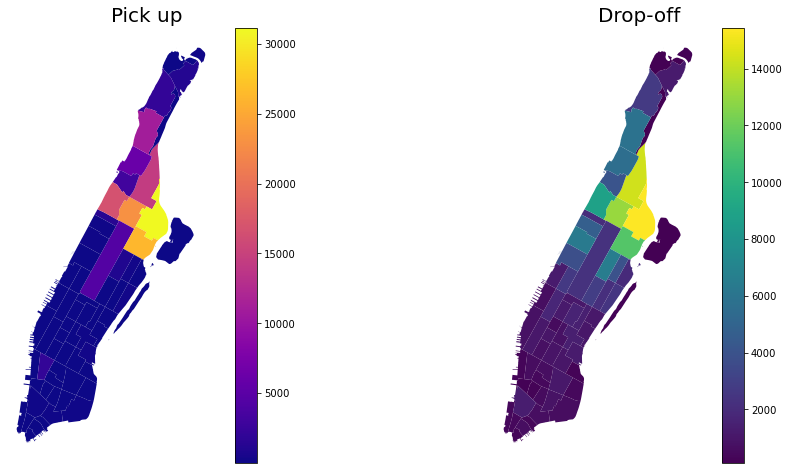

In [41]:
f,axes = plt.subplots(1,2,figsize=(16,8))

ppdP.plot(column='February', ax=axes[0], legend=True, cmap='plasma')
ppdD.plot(column='February', ax=axes[1], legend=True, cmap='viridis')
for ax in axes:
    ax.axis('off')

    
    
axes[0].set_title('Pick up', size=20, **tfont)
axes[1].set_title('Drop-off', size=20, **tfont)

plt.savefig('Man_pre.png', dpi=150)

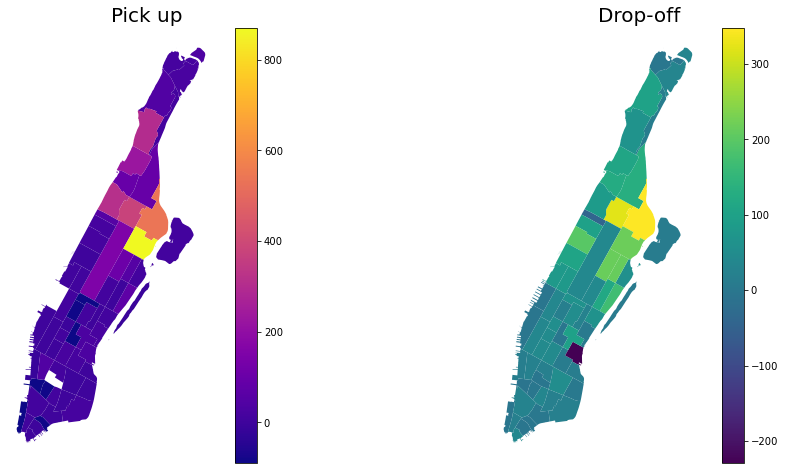

In [42]:
f,axes = plt.subplots(1,2,figsize=(16,8))

ppdP.plot(column='July', ax=axes[0], legend=True, cmap='plasma')
ppdD.plot(column='July', ax=axes[1], legend=True, cmap='viridis')
for ax in axes:
    ax.axis('off')

    
    
axes[0].set_title('Pick up', size=20, **tfont)
axes[1].set_title('Drop-off', size=20, **tfont)

plt.savefig('Man_July.png', dpi=150)

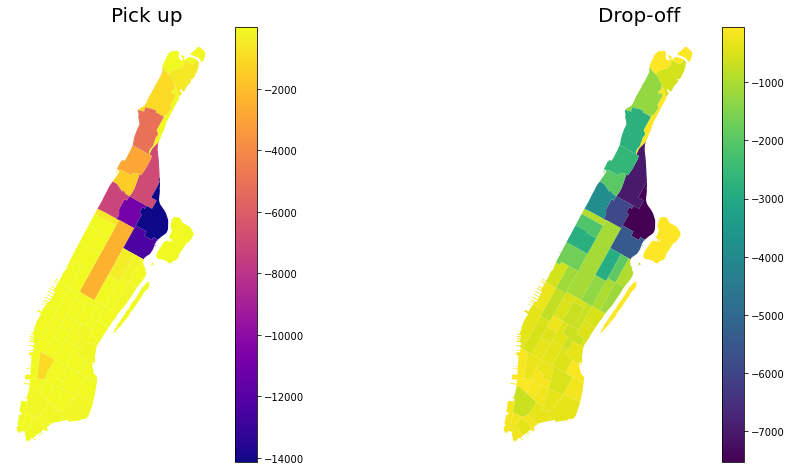

In [43]:
f,axes = plt.subplots(1,2,figsize=(16,8))

ppdP.plot(column='April', ax=axes[0], legend=True, cmap='plasma')
ppdD.plot(column='April', ax=axes[1], legend=True, cmap='viridis')
for ax in axes:
    ax.axis('off')

    
    
axes[0].set_title('Pick up', size=20, **tfont)
axes[1].set_title('Drop-off', size=20, **tfont)

plt.savefig('Man_Ap.png', dpi=150)